# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [1]:
# I`m using thease libraries there for: 
#   importing the images (and more)
import cv2
#   operating with images as multi-dimensional arrays
import numpy as np
#   rectangles color generation
import random
#   detecting faces on the visual media data
import dlib
#   ploting (drawing) numpy arrays as images
from matplotlib import pyplot as plt

# set the plotting window size as 15x10 inches
plt.rcParams['figure.figsize'] = [15, 10]

### Step 1

Load an image (any image that contains faces).

In [2]:
# load the picture of the crispy australian music band :)
img = cv2.imread('data/parcels.jpg')

# convert it to RGB color space
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### Step 2

Load the dlib face predictor.

In [3]:
# load the dlib face detector
detector = dlib.get_frontal_face_detector()

### Step 3

Run the predictor on your image.

In [4]:
# detect faces on the grayscale image with upsampling factor - 1
rects = detector(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 1)
print('Number of detected faces:', len(rects))

Number of detected faces: 5


### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

(<matplotlib.image.AxesImage at 0x231ed95a670>,
 Text(0.5, 1.0, 'dlib face detector result'))

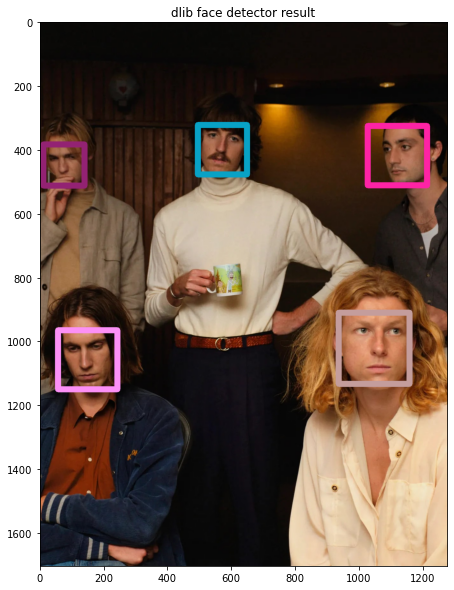

In [5]:
# define the function for converting dlib rectangles to cv2 rectangles with coordinates on the image
def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)

# definine the function for adding rectangles on the faces on the photo
def get_photo_with_detected_faces(img, rects=False, upsampling_factor=1):
    
    # if the faces rectangles haven't been detected yet, let`s detect them
    if not rects:
        rects = detector(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), upsampling_factor)
        
    # prepare the result photo variable
    result_dlib = np.copy(img)
    
    # draw each rectangle around the face with random color
    for ri, rect in enumerate(rects):
        x, y, w, h = rect_to_bb(rect)
        cv2.rectangle(result_dlib, (x, y), (x+w, y+h), [random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)], int((img.shape[0]/100) * 1.1))
        
    # return the result
    return result_dlib
    
# draw the dlib face detector result
plt.imshow(get_photo_with_detected_faces(img, rects)), plt.title('dlib face detector result')

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

### Many small faces detection

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x231ed338400>)

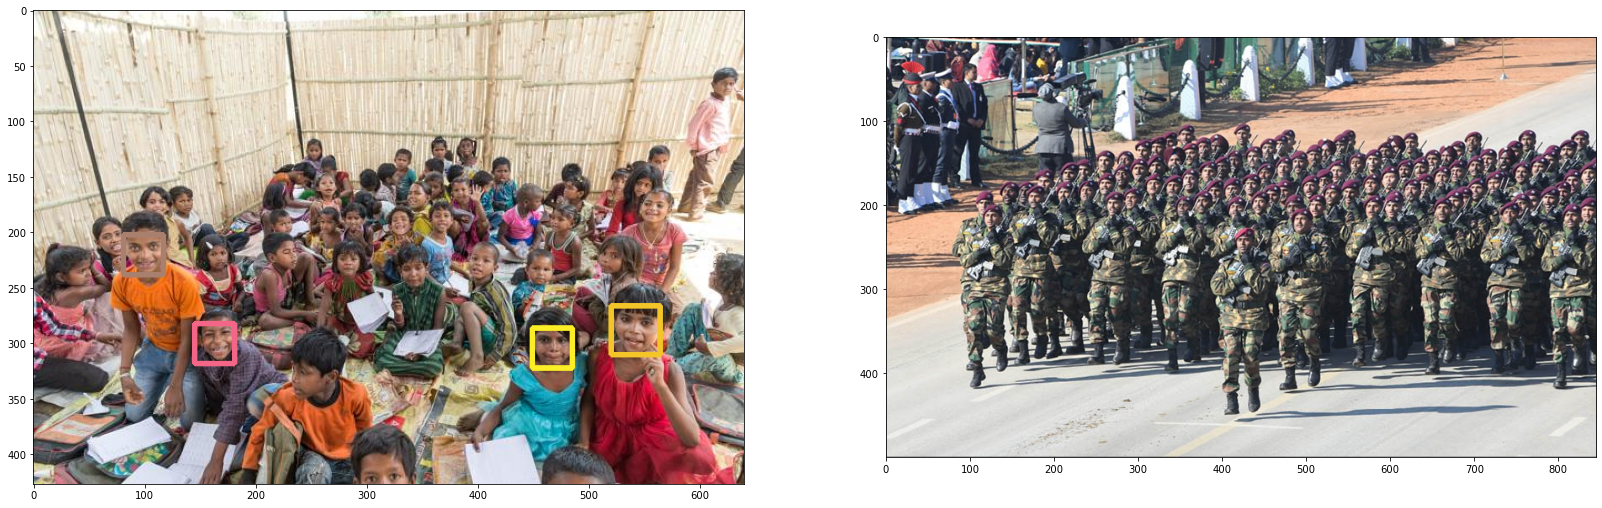

In [6]:
# set the plotting window size as 20x20 inches
plt.rcParams['figure.figsize'] = [28, 20]

# try to find many faces on the photo
img = cv2.cvtColor(cv2.imread('data/many_people.jpg'), cv2.COLOR_BGR2RGB)
plt.subplot(121), plt.imshow(get_photo_with_detected_faces(img))

# try to find many faces on the photo #2
img = cv2.cvtColor(cv2.imread('data/many_people_2.jpg'), cv2.COLOR_BGR2RGB)
plt.subplot(122), plt.imshow(get_photo_with_detected_faces(img))

### Not working with faces size less than 30-40 px 
Let's try to increase the upsampling factor

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x231ecd0a190>)

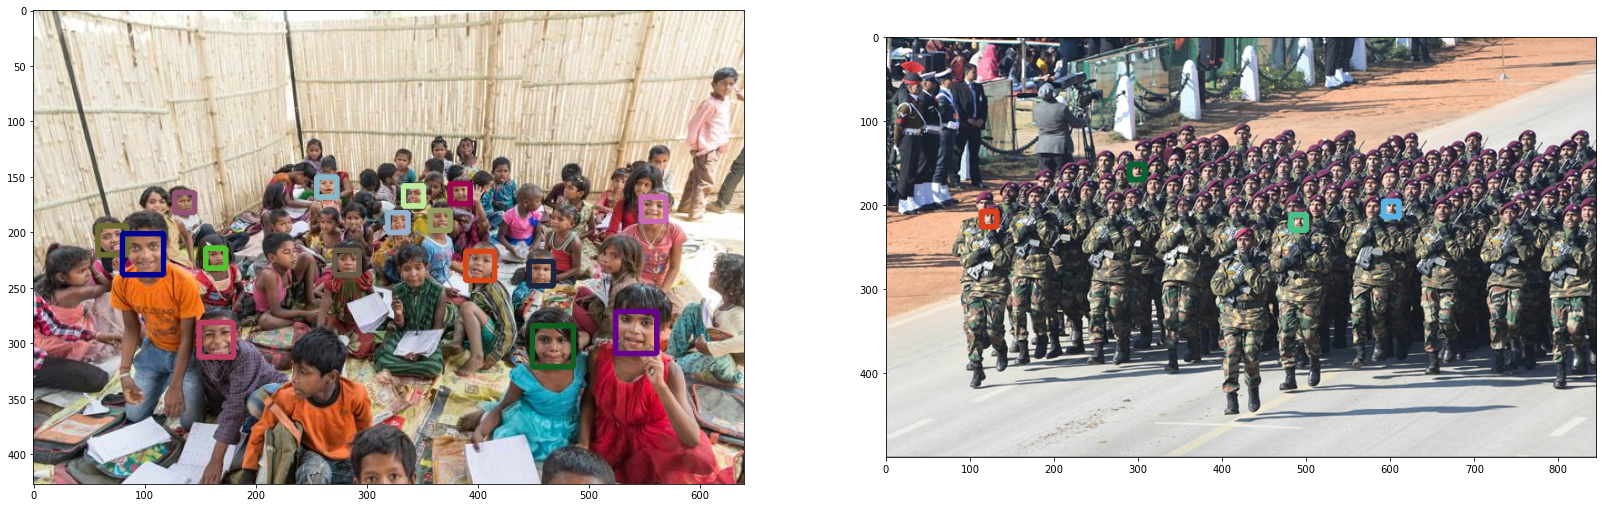

In [7]:
# try to find many faces on the photo with upsampling factor - 2
img = cv2.cvtColor(cv2.imread('data/many_people.jpg'), cv2.COLOR_BGR2RGB)
plt.subplot(121), plt.imshow(get_photo_with_detected_faces(img, upsampling_factor=2))

# try to find many faces on the photo #2 with upsampling factor - 2
img = cv2.cvtColor(cv2.imread('data/many_people_2.jpg'), cv2.COLOR_BGR2RGB)
plt.subplot(122), plt.imshow(get_photo_with_detected_faces(img, upsampling_factor=2))

A little bit better, but works not good enough and takes more time

### Faces with personal equipment and hats

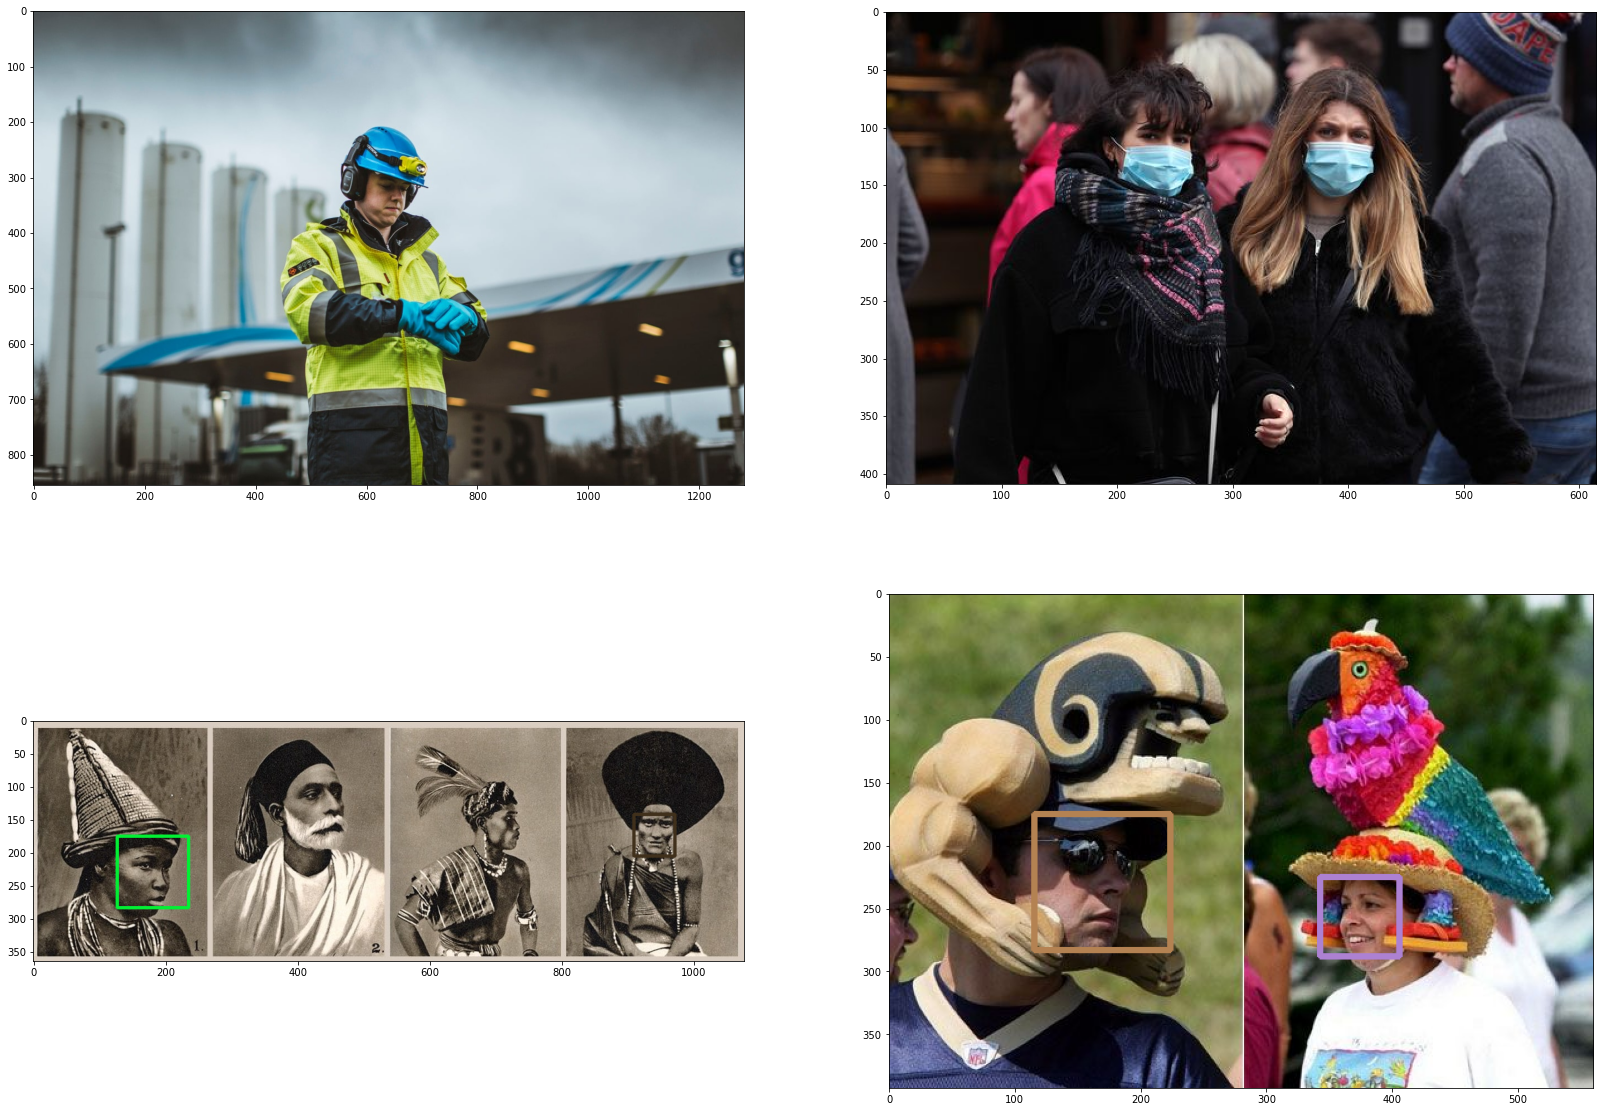

In [8]:
f, axarr = plt.subplots(2, 2)

# try to find the face with a helmet
img = cv2.cvtColor(cv2.imread('data/personal_equipment_2.jpg'), cv2.COLOR_BGR2RGB)
axarr[0, 0].imshow(get_photo_with_detected_faces(img))

# try to find faces with the covid masks
img = cv2.cvtColor(cv2.imread('data/personal_equipment_3.jpg'), cv2.COLOR_BGR2RGB)
axarr[0, 1].imshow(get_photo_with_detected_faces(img))

# try to find the faces with hats
img = cv2.cvtColor(cv2.imread('data/hats_1.jpg'), cv2.COLOR_BGR2RGB)
axarr[1, 0].imshow(get_photo_with_detected_faces(img))

# try to find the face with a hat #2
img = cv2.cvtColor(cv2.imread('data/hats_2.jpg'), cv2.COLOR_BGR2RGB)
axarr[1, 1].imshow(get_photo_with_detected_faces(img))

### Not working with profile, partial and masked faces
Let's try to increase the upsampling factor

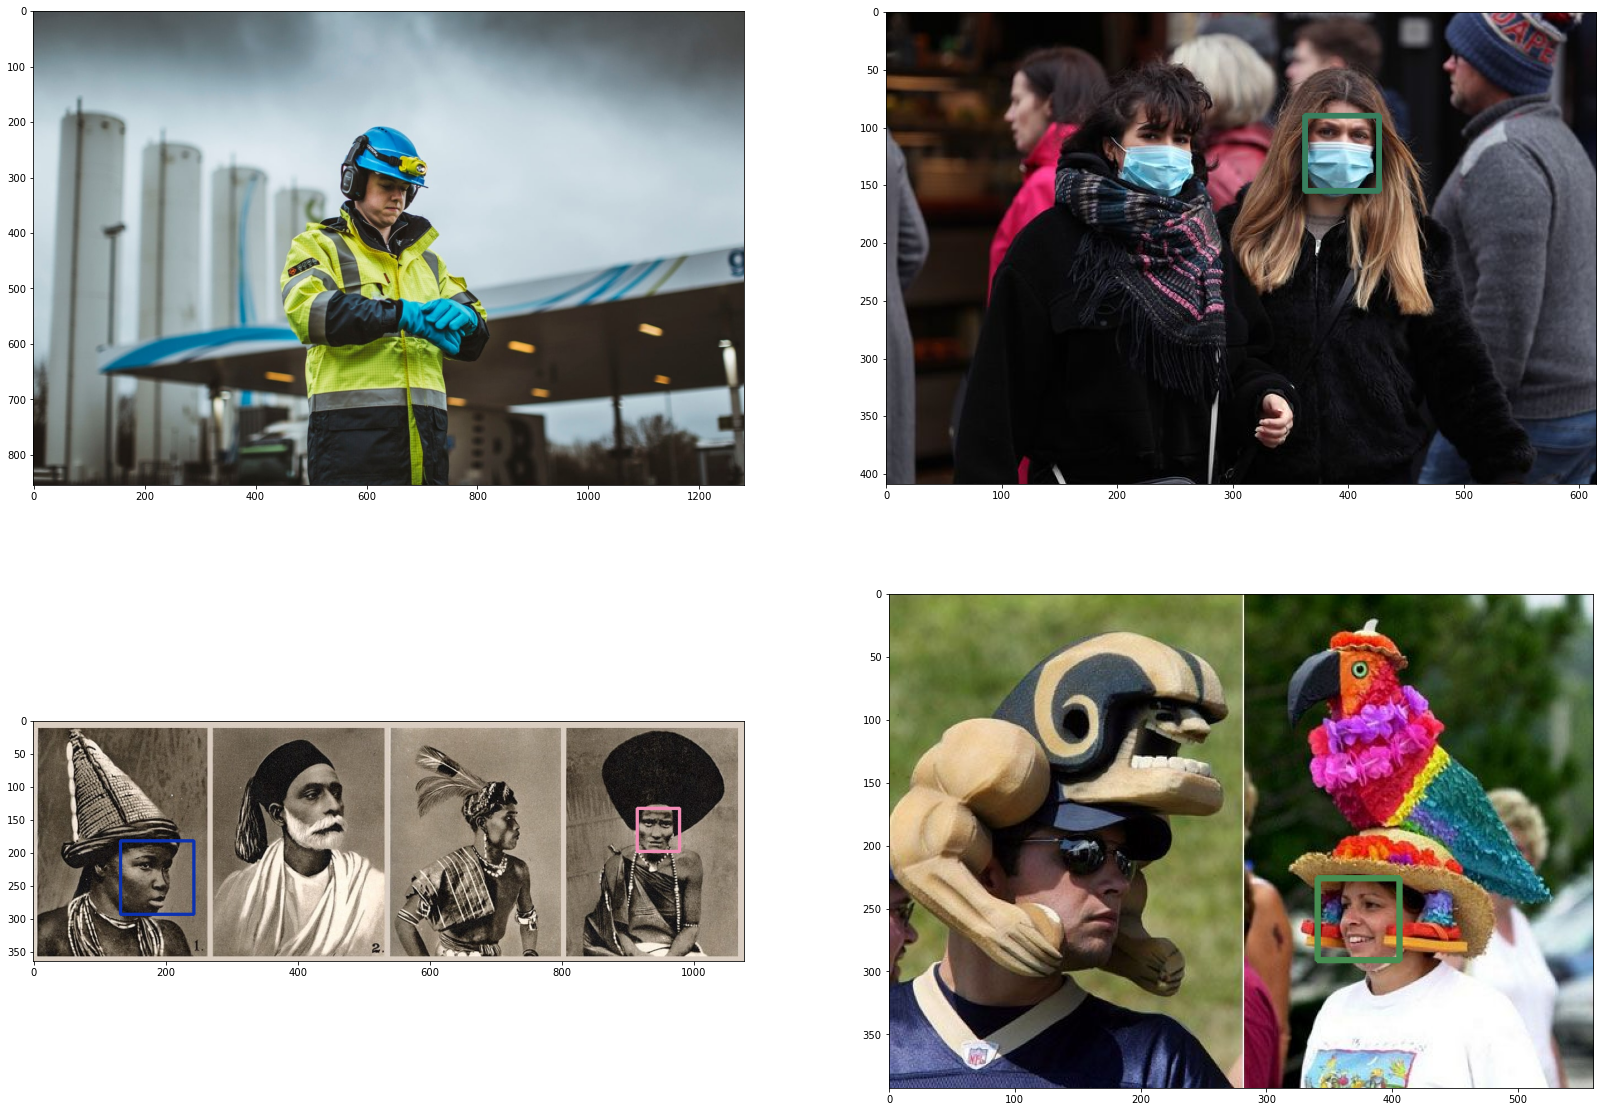

In [9]:
f, axarr = plt.subplots(2, 2)

# try to find the face with a helmet
img = cv2.cvtColor(cv2.imread('data/personal_equipment_2.jpg'), cv2.COLOR_BGR2RGB)
axarr[0, 0].imshow(get_photo_with_detected_faces(img, upsampling_factor=2))

# try to find faces with the covid masks
img = cv2.cvtColor(cv2.imread('data/personal_equipment_3.jpg'), cv2.COLOR_BGR2RGB)
axarr[0, 1].imshow(get_photo_with_detected_faces(img, upsampling_factor=2))

# try to find the faces with hats
img = cv2.cvtColor(cv2.imread('data/hats_1.jpg'), cv2.COLOR_BGR2RGB)
axarr[1, 0].imshow(get_photo_with_detected_faces(img, upsampling_factor=2))

# try to find the face with a hat #2
img = cv2.cvtColor(cv2.imread('data/hats_2.jpg'), cv2.COLOR_BGR2RGB)
axarr[1, 1].imshow(get_photo_with_detected_faces(img, upsampling_factor=2))

The same, but one of the masked face is detected

### Lets try to detect the faces with the glasses

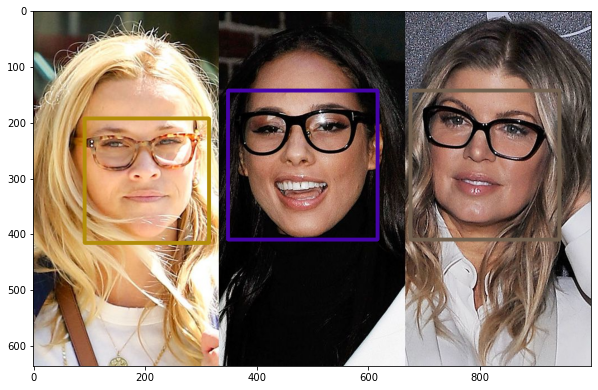

In [10]:
# set the plotting window size as 20x20 inches
plt.rcParams['figure.figsize'] = [10, 15]

# try to find a few faces with the glasses
img = cv2.cvtColor(cv2.imread('data/glasses_2.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(get_photo_with_detected_faces(img))

### Works good enogh!